In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def growth_rate(fee_rate, mean, sigma, type='incoming'):
    gamma = 1 - fee_rate
    theta = 2 * mean / sigma**2
    
    # Handle edge cases
    if abs(gamma) < 1e-10 or gamma >= 1:
        return np.nan
        
    if mean == 0:
        alpha = beta = - sigma**2 / (4 * np.log(gamma))
    else:
        # Handle potential numerical issues
        try:
            alpha = mean / (gamma ** (-2 * theta) - 1)
            beta = mean / (1 - gamma ** (2 * theta))
        except:
            return np.nan
    if type == 'incoming':
        return 1/(1 + gamma) * beta - gamma/(1 + gamma) * alpha
    else:
        return 0.5 * beta - 0.5 * alpha



In [2]:

def compare_mu(type='incoming'):
    fig, axs = plt.subplots(1, 2, figsize=(12, 8))  # Increased height slightly to accommodate legend
    # fig.suptitle('Growth Rate vs Fee Rate for Different μ and σ', fontsize=16)

    # Parameters
    sigma_values = [0.2, 0.4, 0.8]
    mu_values = [0, 0.5]
    titles = ['No Drift\n(μ = 0)', 'Positive Drift\n(μ = 0.5)']
    fee_rates = np.linspace(0.1, 0.9999, 10000)  # Avoid fee_rate = 1

    # Create each subplot
    lines = []  # Store line objects for legend
    for j, (mu, title) in enumerate(zip(mu_values, titles)):
        for sigma in sigma_values:
            growth_values = []
            for fee in fee_rates:
                result = growth_rate(fee, mu, sigma, type)
                growth_values.append(result)
            
            line, = axs[j].plot(fee_rates, growth_values, label=f'σ = {sigma}')
            if j == 0:  # Only store lines from first subplot for legend
                lines.append(line)
                axs[j].set_ylabel('Growth Rate')
                
            axs[j].grid(True, alpha=0.3)
            axs[j].set_title(title, fontweight='bold')
            if j == 1:
                axs[j].set_xlabel('Fee Rate')
                

    # Add a single legend below the subplots
    fig.legend(lines, [f'σ = {sigma}' for sigma in sigma_values], 
            loc='center', bbox_to_anchor=(0.5, 0.1),
            ncol=3)

    # Adjust layout to prevent legend overlap
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Make room for legend at bottom
    plt.show()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Create a 2x2 grid of subplots
def plot_growth_rate(type='incoming', positive_mu=False):
    fig = plt.figure(figsize=(12, 12))
    gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2])  # Add some space on the right
    axs = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]

    # Parameters
    sigma_values = [0.2, 0.4, 0.8]
    if positive_mu:
        mu_values = [0.5, 1, 1.5, 2]  # Four values for four subplots
        titles = ['μ = 0.5', 'μ = 1.0', 'μ = 1.5', 'μ = 2.0']
    else:
        mu_values = [-0.5, -1, -1.5, -2]  # Four values for four subplots
        titles = ['μ = -0.5', 'μ = -1.0', 'μ = -1.5', 'μ = -2.0']
    fee_rates = np.linspace(0.1, 0.9999, 10000)  # Avoid fee_rate = 1

    # Create each subplot
    lines = []  # Store line objects for legend
    for idx, (mu, title) in enumerate(zip(mu_values, titles)):
        for sigma in sigma_values:
            growth_values = []
            for fee in fee_rates:
                result = growth_rate(fee, mu, sigma, type)
                growth_values.append(result)
            
            line, = axs[idx].plot(fee_rates, growth_values, label=f'σ = {sigma}')
            if idx == 0:  # Only store lines from first subplot for legend
                lines.append(line)
                
            axs[idx].grid(True, alpha=0.3)
            axs[idx].set_title(title, fontweight='bold')
            axs[idx].set_xlabel('Fee Rate')
            
            # Set y-axis labels
            if idx % 2 == 0:  # Left plots
                axs[idx].set_ylabel('Growth Rate')

    # Add a single legend below the subplots
    fig.legend(lines, [f'σ = {sigma}' for sigma in sigma_values], 
            loc='center', bbox_to_anchor=(0.5, 0.02),
            ncol=3)

    # Adjust layout to prevent legend overlap
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)  # Make room for legend at bottom
    plt.show()

In [4]:
def plot_compare_in_and_out(positive_mu=False, zero_mu=False):
    if not zero_mu:
        fig = plt.figure(figsize=(12, 12))
        gs = fig.add_gridspec(2, 2, width_ratios=[1, 1.2])  # Add some space on the right
        axs = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]

        # Parameters
        sigma_values = [0.2, 0.4, 0.8]
        if positive_mu:
            mu_values = [0.5, 1, 1.5, 2]  # Four values for four subplots
            titles = ['μ = 0.5', 'μ = 1.0', 'μ = 1.5', 'μ = 2.0']
        else:
            mu_values = [-0.5, -1, -1.5, -2]  # Four values for four subplots
            titles = ['μ = -0.5', 'μ = -1.0', 'μ = -1.5', 'μ = -2.0']
        fee_rates = np.linspace(0.1, 0.99, 10000)  # Avoid fee_rate = 1
        types = ['incoming', 'outgoing']
        colors = ['blue', 'red', 'green']  # One color per sigma value

        # Create each subplot
        lines = []  # Store line objects for legend
        for idx, (mu, title) in enumerate(zip(mu_values, titles)):
            for i, sigma in enumerate(sigma_values):
                for type in types:
                    growth_values = []
                    for fee in fee_rates:
                        result = growth_rate(fee, mu, sigma, type)
                        growth_values.append(result)
                    
                    linestyle = '-' if type == 'incoming' else '--'
                    line, = axs[idx].plot(fee_rates, growth_values, 
                                        color=colors[i], 
                                        linestyle=linestyle,
                                        label=f'σ={sigma} ({type})')
                    
                    if idx == 0:  # Only store lines from first subplot for legend
                        lines.append(line)
                    
                axs[idx].grid(True, alpha=0.3)
                axs[idx].set_title(title, fontweight='bold')
                axs[idx].set_xlabel('Fee Rate')
                
                # Set y-axis labels
                if idx % 2 == 0:  # Left plots
                    axs[idx].set_ylabel('Growth Rate')

        # Add a single legend below the subplots
        fig.legend(lines, [f'σ={sigma} ({type})' for sigma in sigma_values for type in types], 
                loc='center', bbox_to_anchor=(0.5, 0.02),
                ncol=3)

        # Adjust layout to prevent legend overlap
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.1)  # Make room for legend at bottom
        plt.show()
        
        
    else:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Parameters
        sigma_values = [0.2, 0.4, 0.8]
        mu = 0  # No drift
        fee_rates = np.linspace(0.1, 0.99, 200)  # Avoid fee_rate = 0 and 1
        types = ['incoming', 'outgoing']
        colors = ['blue', 'red', 'green']  # One color per sigma value

        # Create the plot
        for i, sigma in enumerate(sigma_values):
            for type in types:
                growth_values = []
                for fee in fee_rates:
                    result = growth_rate(fee, mu, sigma, type)
                    growth_values.append(result)
            
                linestyle = '-' if type == 'incoming' else '--'
                ax.plot(fee_rates, growth_values, 
                        color=colors[i], 
                        linestyle=linestyle,
                        label=f'σ={sigma} ({type})')

        ax.grid(True, alpha=0.3)
        ax.set_title('Growth Rate vs Fee Rate (μ = 0)', fontweight='bold')
        ax.set_xlabel('Fee Rate')
        ax.set_ylabel('Growth Rate')

        # Add legend below the plot
        plt.legend(bbox_to_anchor=(0.5, -0.15), 
                loc='upper center',
                ncol=3)

        # Adjust layout to prevent legend overlap
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.2)  # Make room for legend at bottom
        plt.show()

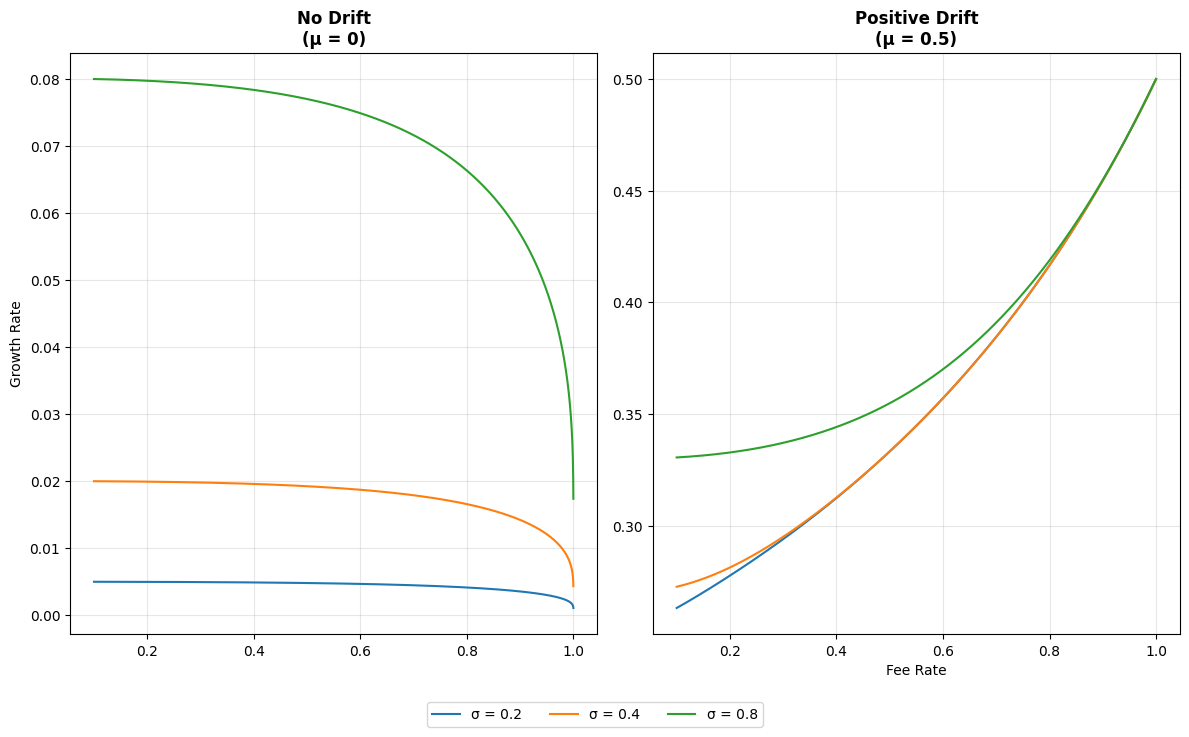

In [5]:
compare_mu('incoming')

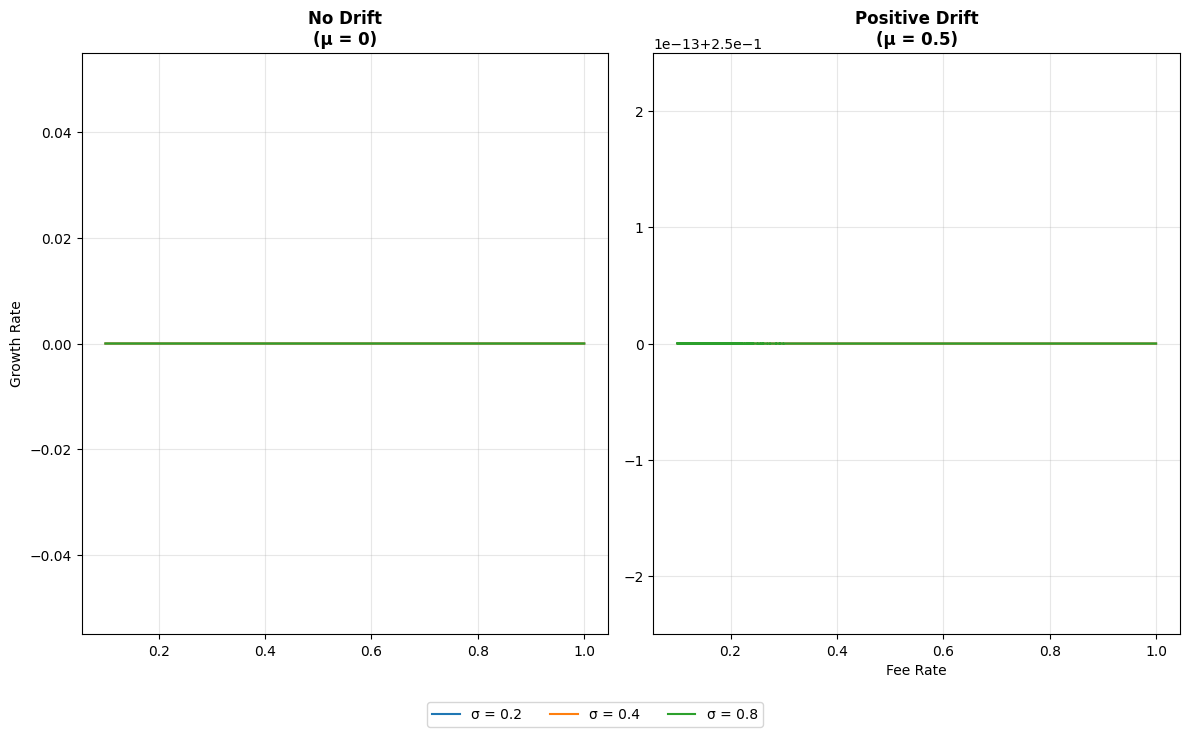

In [6]:
compare_mu('outgoing')

/tmp/ipykernel_881533/2100705083.py:18: RuntimeWarning: overflow encountered in double_scalars
  alpha = mean / (gamma ** (-2 * theta) - 1)


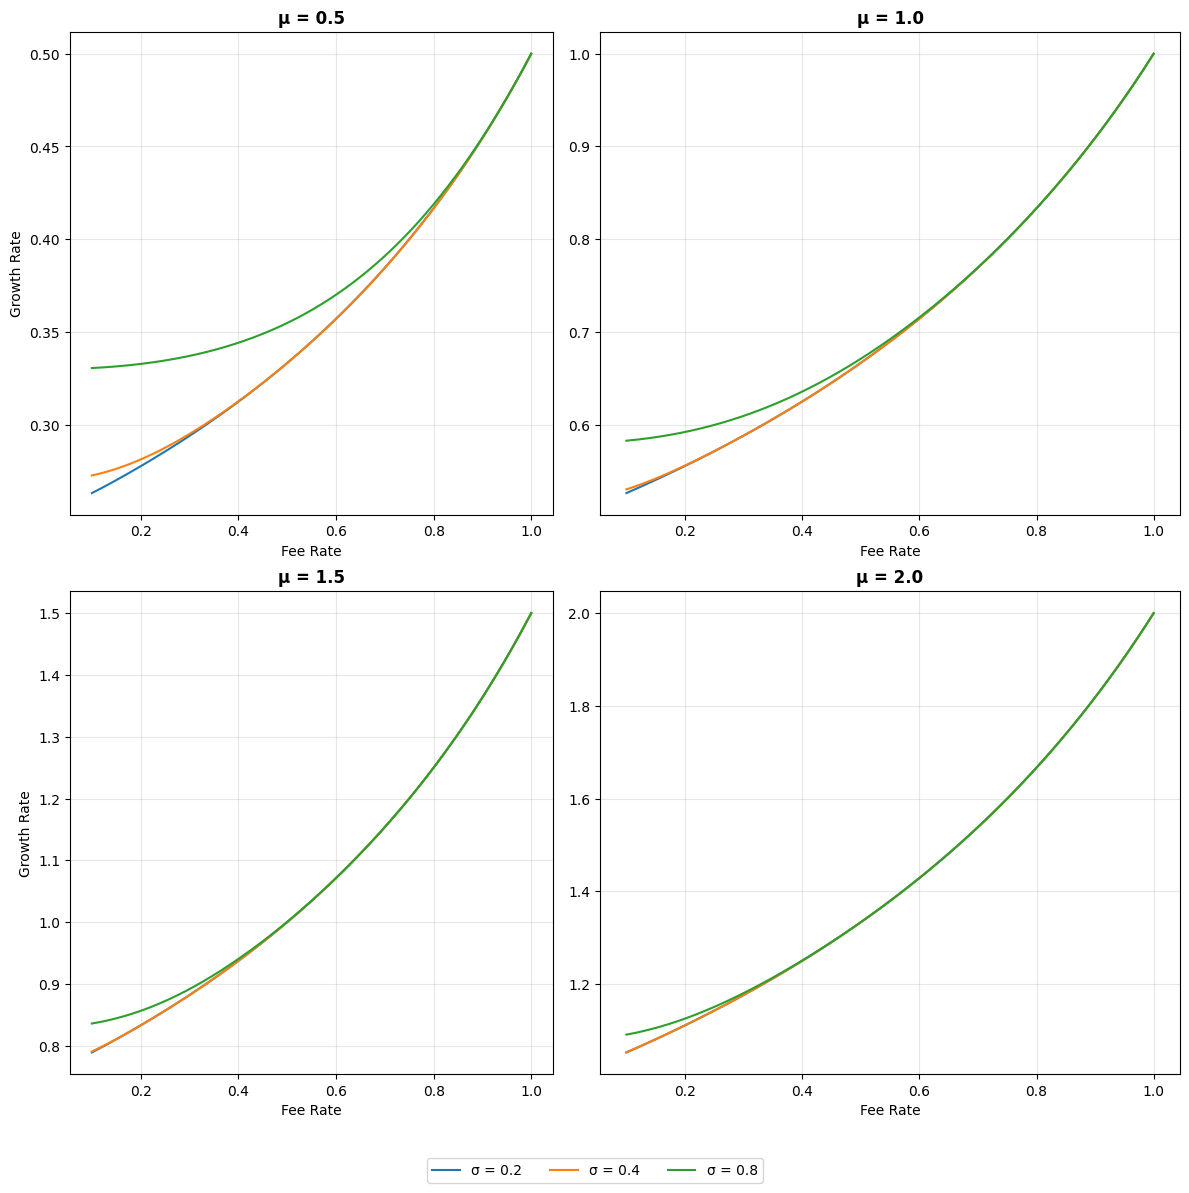

/tmp/ipykernel_881533/2100705083.py:19: RuntimeWarning: overflow encountered in double_scalars
  beta = mean / (1 - gamma ** (2 * theta))


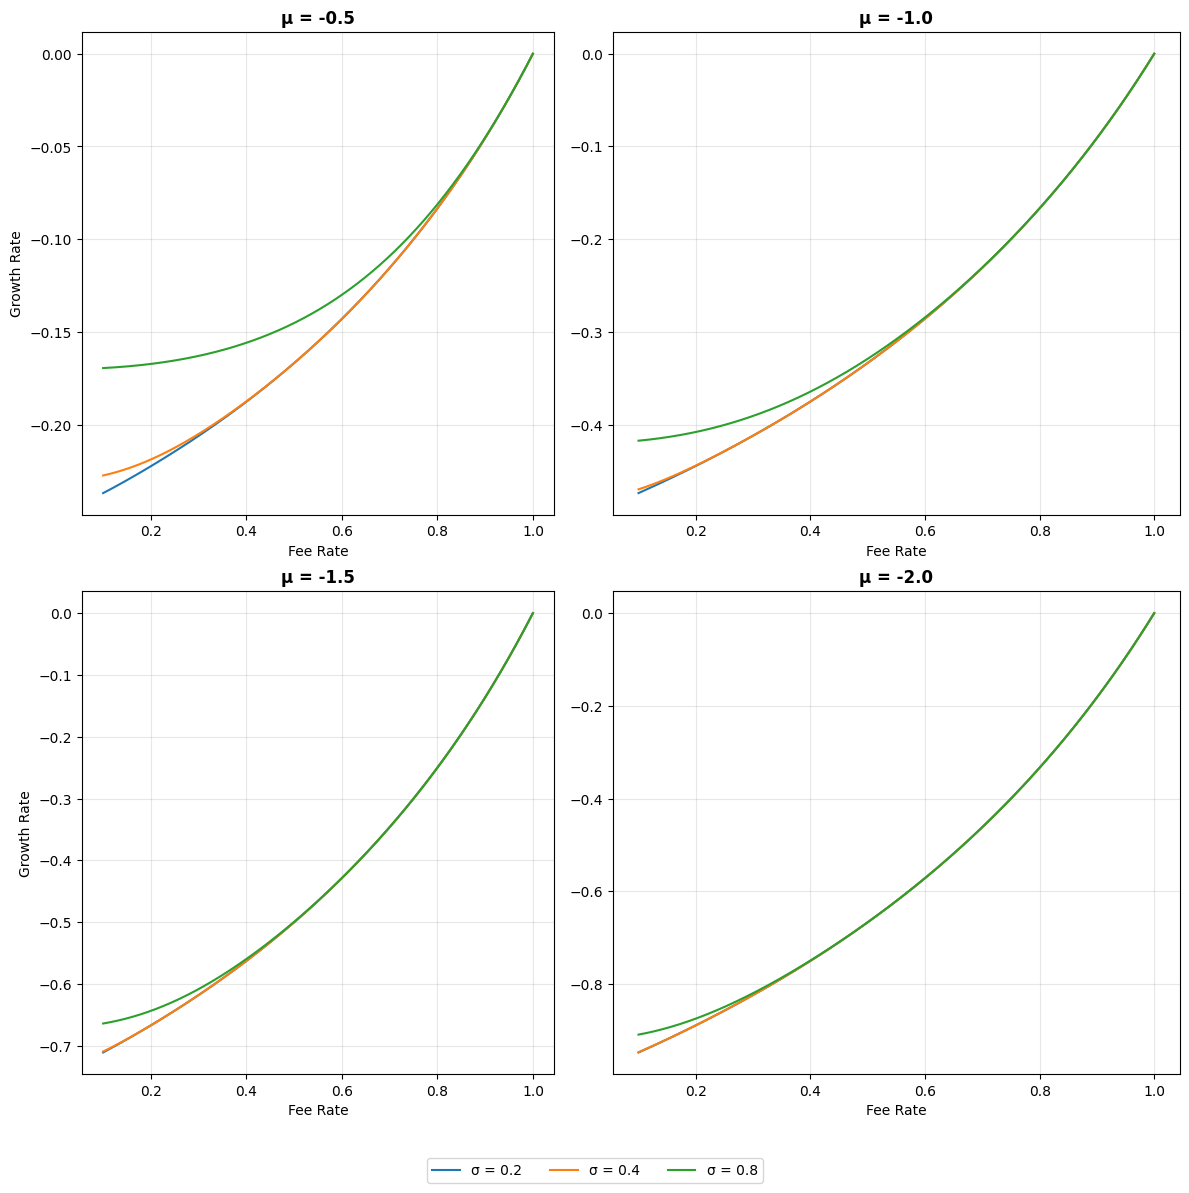

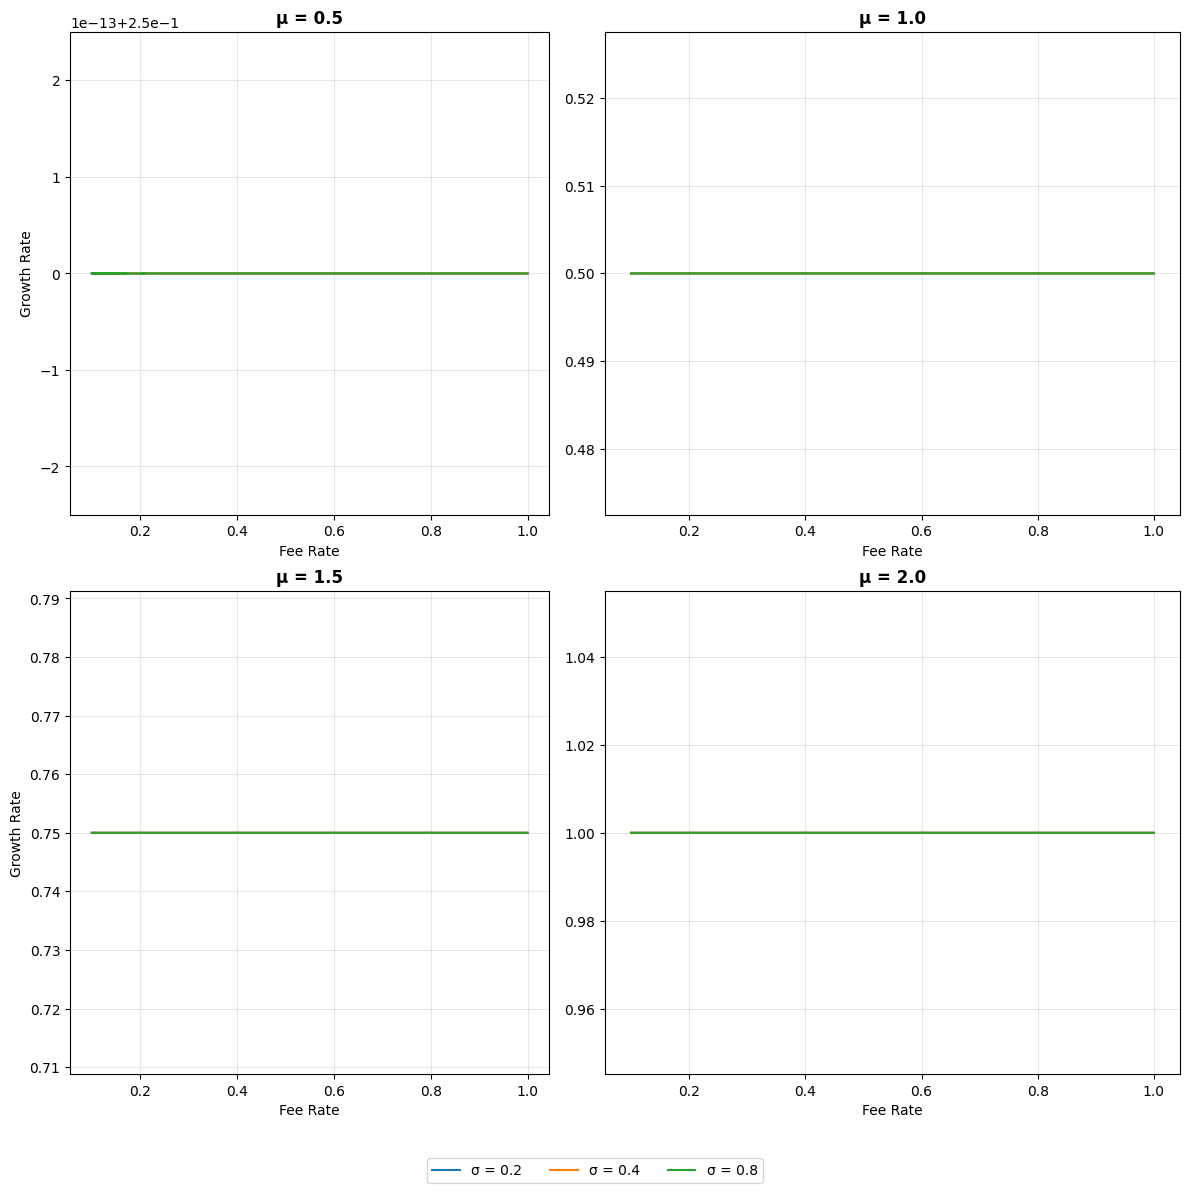

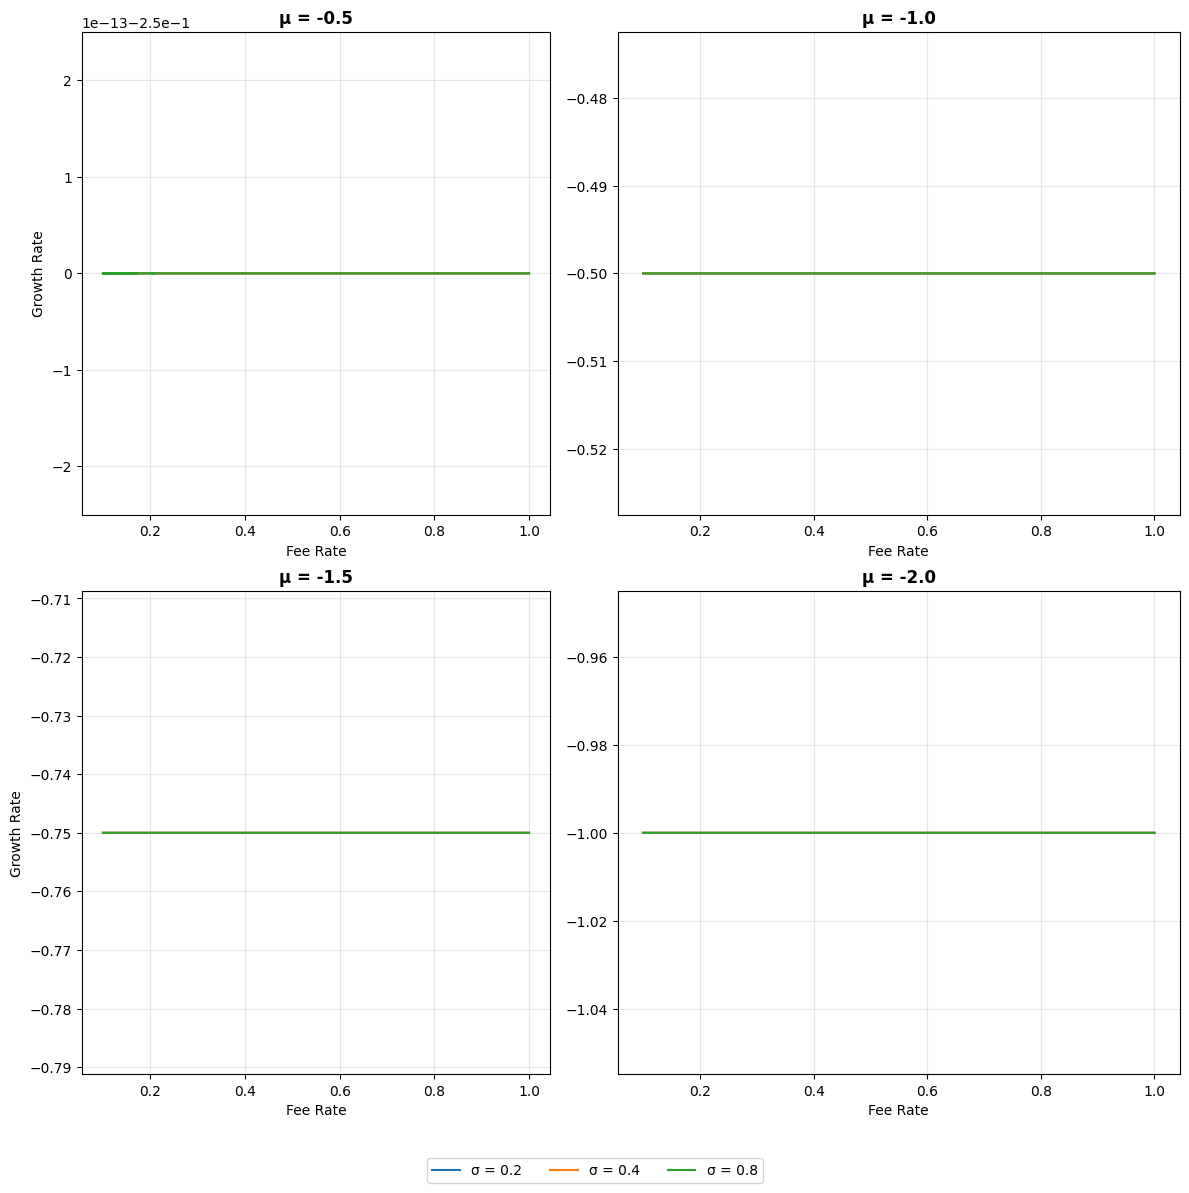

In [7]:
for source in ['incoming', 'outgoing']:
    for positive_mu in [True, False]:
        plot_growth_rate(source, positive_mu)
        


/tmp/ipykernel_881533/2100705083.py:18: RuntimeWarning: overflow encountered in double_scalars
  alpha = mean / (gamma ** (-2 * theta) - 1)


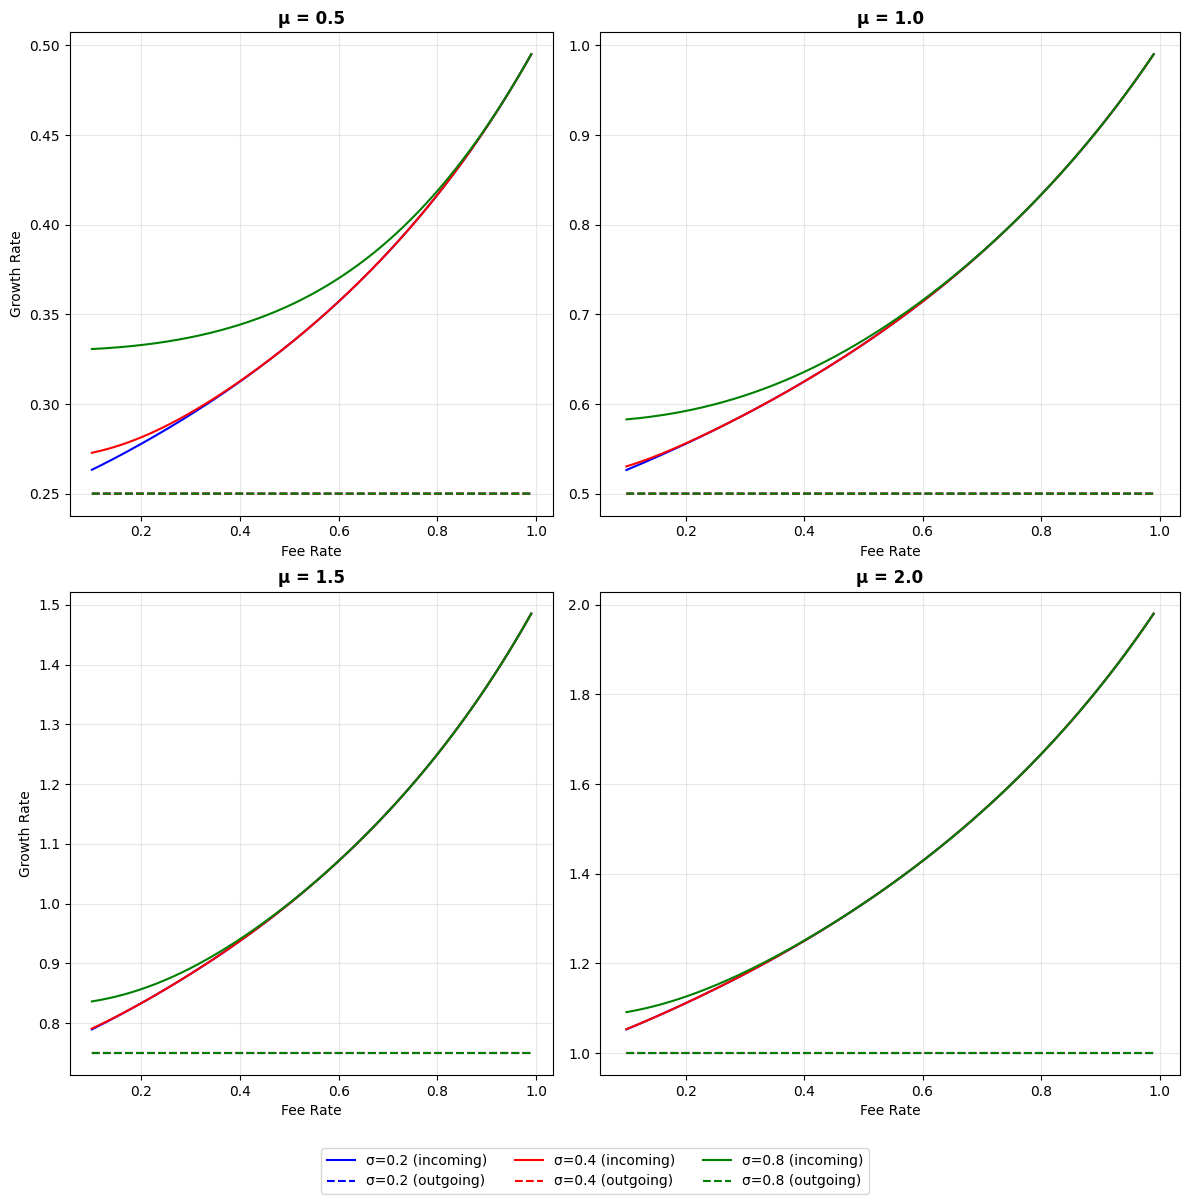

/tmp/ipykernel_881533/2100705083.py:19: RuntimeWarning: overflow encountered in double_scalars
  beta = mean / (1 - gamma ** (2 * theta))


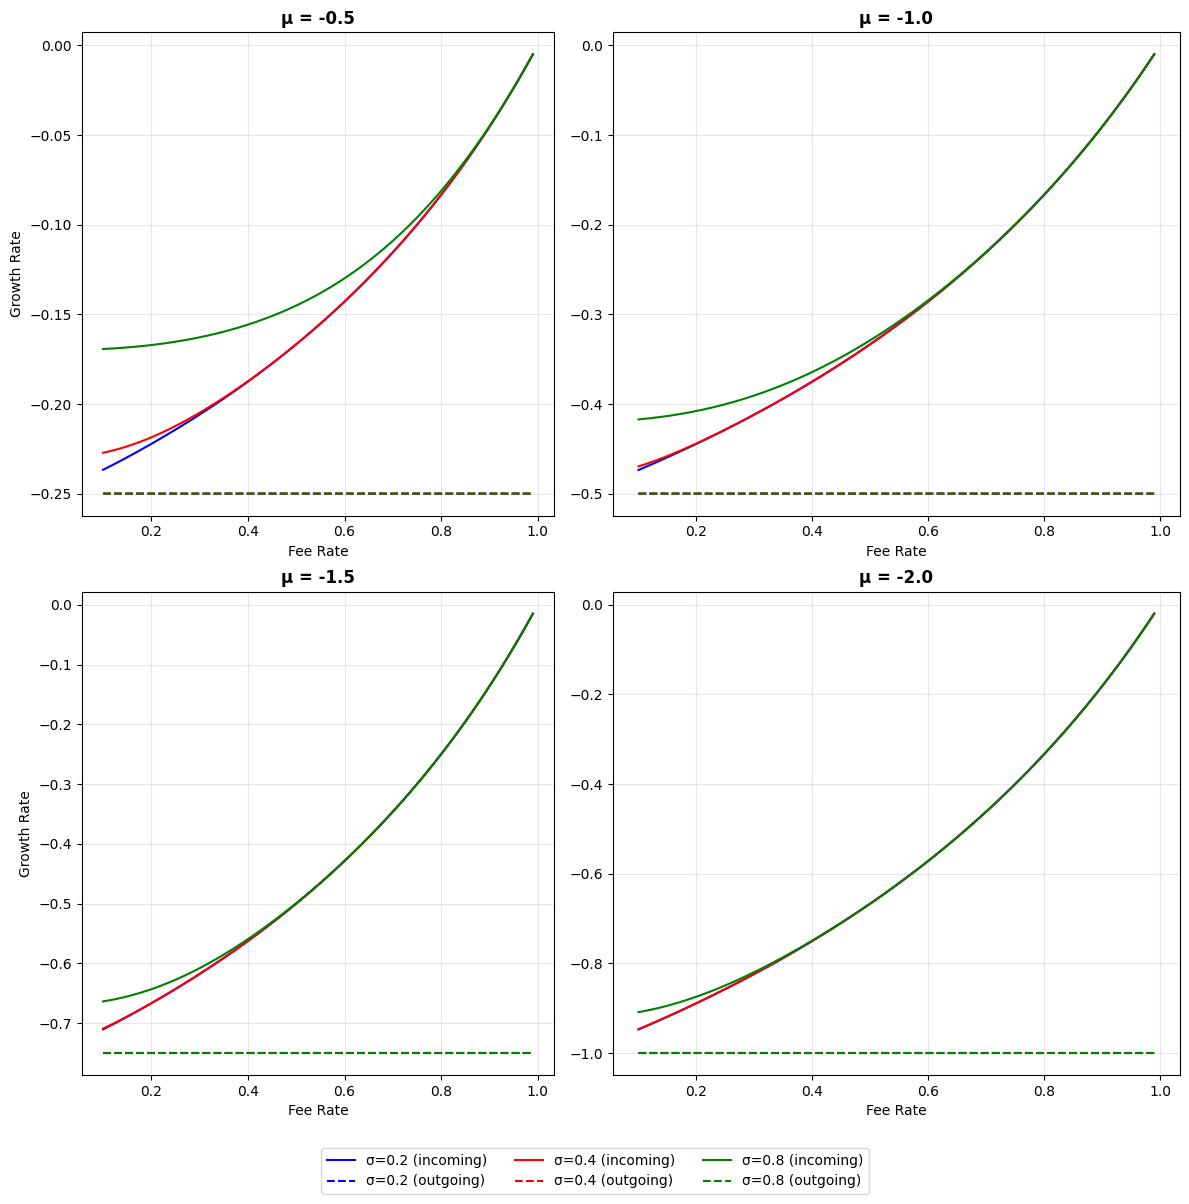

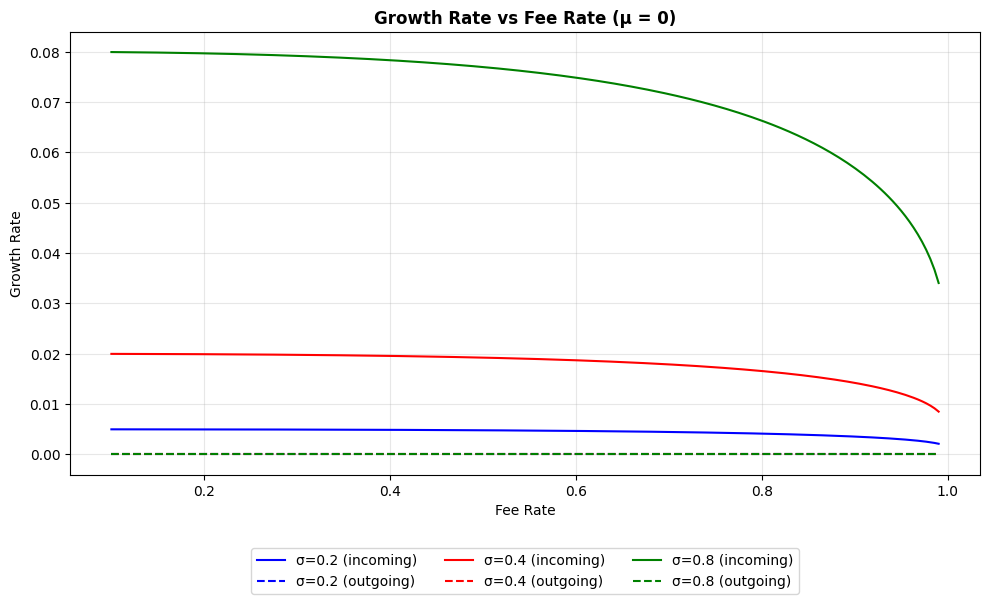

In [8]:

for positive_mu in [True, False]:
    plot_compare_in_and_out(positive_mu=positive_mu)
plot_compare_in_and_out(zero_mu=True)